In [135]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib as plt

In [2]:
valores = [1,2,3,4,5,4,3,2,1,2,3,4,5,4,3,2,1,2,3,4,5]
df = pd.DataFrame( { 'Values': valores },
                    index = pd.date_range(start = '01/01/2019', periods = len(valores), freq = 'M'),
                 )
df.index.name = 'Fecha'
df.head()

,Values
Fecha,
2019-01-31,1
2019-02-28,2
2019-03-31,3
2019-04-30,4
2019-05-31,5


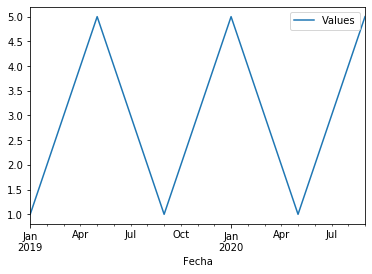

In [4]:
%matplotlib inline

df.plot()

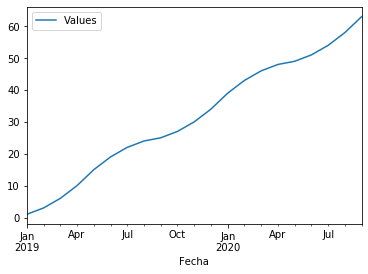

In [121]:
df.cumsum().plot()

In [128]:
df.head()

,Values
Fecha,
2019-01-31,1
2019-02-28,2
2019-03-31,3
2019-04-30,4
2019-05-31,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AE4BB6B48>]],
      dtype=object)

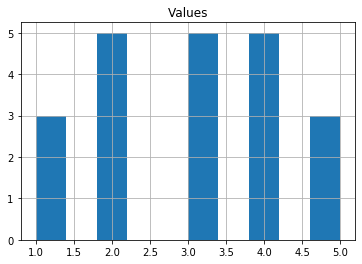

In [5]:
df.hist()

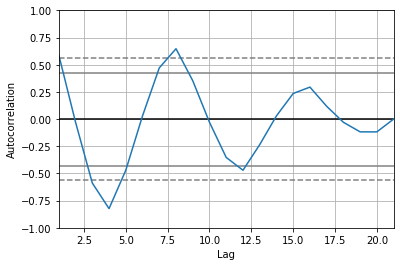

In [6]:
autocorrelation_plot(df)

In [143]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AF8B33F08>,
      dtype=object)

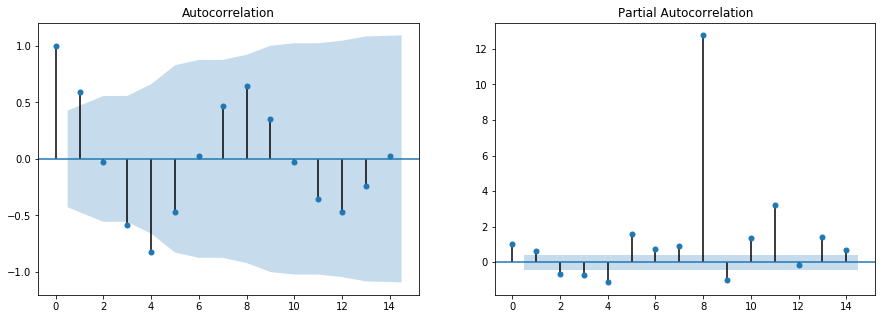

In [150]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.pyplot.subplots(nrows=1, ncols=2, figsize = (15,5))

plot_acf(df.Values, ax = axes[0])
plot_pacf(df.Values, ax = axes[1])

plt.pyplot.show()

---------------------------

In [9]:
import statsmodels.api as sm

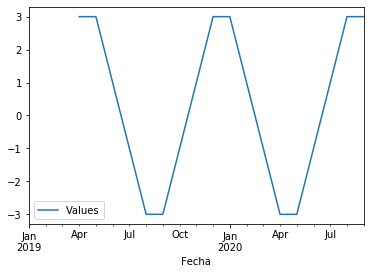

In [16]:
df.diff(3).plot()

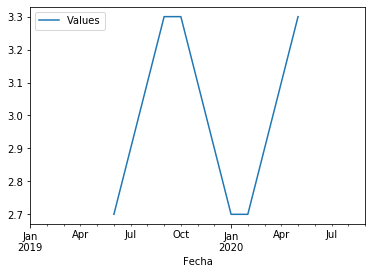

In [26]:
df.rolling(10).mean(center = True).plot()

In [27]:
dft = pd.read_csv('https://pkgstore.datahub.io/core/global-temp/annual_csv/data/a26b154688b061cdd04f1df36e4408be/annual_csv.csv')

In [28]:
dft

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,0.9900
2,GCAG,2015,0.8998
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408
...,...,...,...
269,GISTEMP,1882,-0.1000
270,GCAG,1881,-0.0628
271,GISTEMP,1881,-0.1200
272,GCAG,1880,-0.1148


In [35]:
dft = pd.read_csv('https://pkgstore.datahub.io/core/global-temp/monthly/archive/5a463e14023334e1f90454da11d3deee/monthly.csv')
dft.head()

,Source,Date,Mean
0,GCAG,2016-12,0.7895
1,GISTEMP,2016-12,0.8100
2,GCAG,2016-11,0.7504
3,GISTEMP,2016-11,0.9300
4,GCAG,2016-10,0.7292


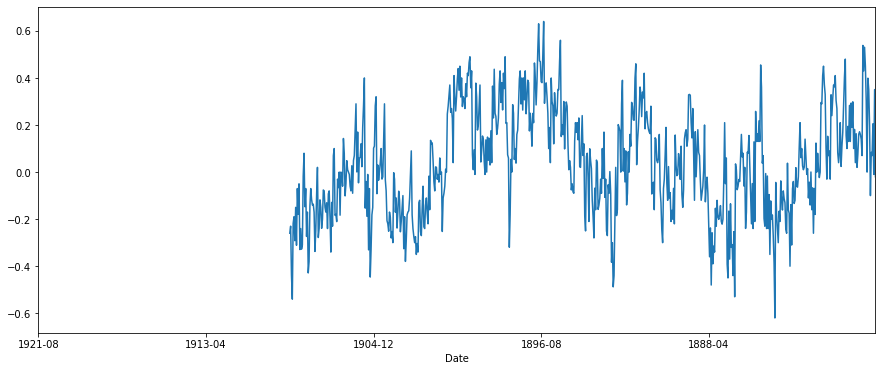

In [113]:
dft.set_index('Date').iloc[-1000:,:]['Mean'].diff(300).plot(figsize = (15,6))

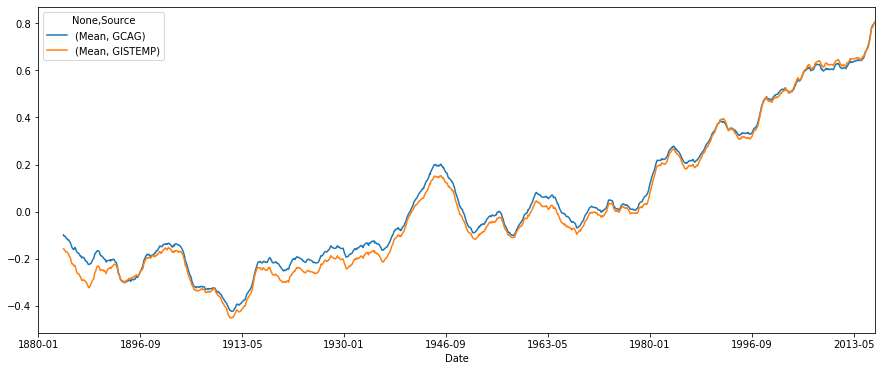

In [75]:
dft.groupby(['Source', 'Date']).mean().unstack(0).rolling(50).mean().plot(figsize = (15,6))

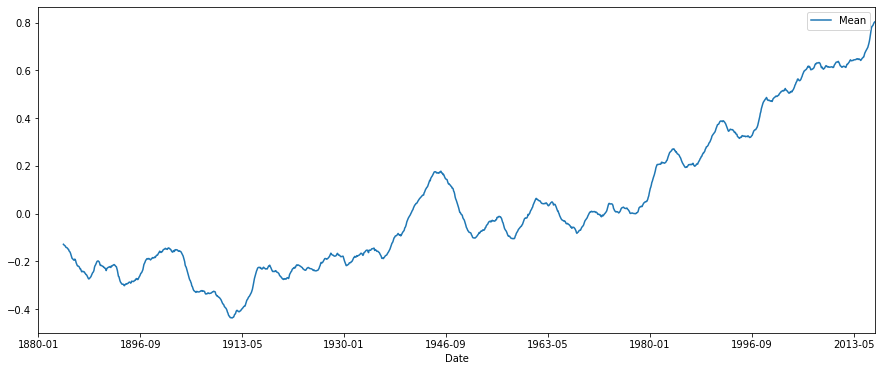

In [87]:
dft.groupby('Date').mean().rolling(50).mean().plot(figsize = (15,6))

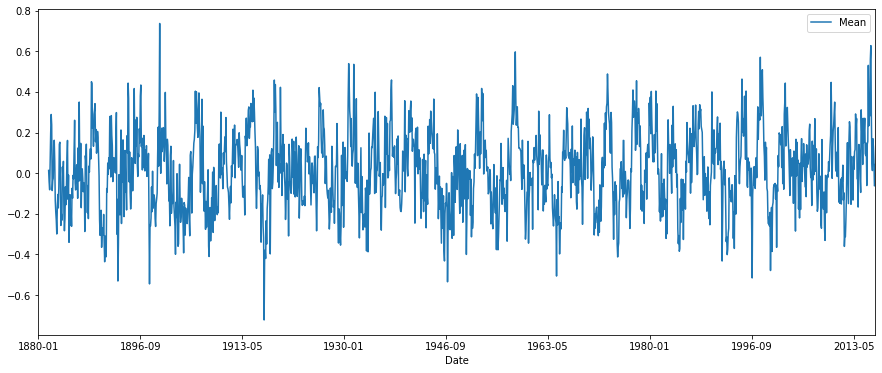

In [39]:
dft.groupby('Date').mean().diff(20).plot(figsize = (15,6))

In [163]:
y = pd.Period('2016', 'A-SEP')

In [164]:
y

Period('2016', 'A-SEP')

In [166]:
q = pd.Period('2015Q2')

In [167]:
q

Period('2015Q2', 'Q-DEC')

In [168]:
urDF = pd.read_csv('http://bit.ly/uforeports', parse_dates = ['Time'])

In [173]:
urDF.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [175]:
urDF.set_index('Time', inplace = True)

In [193]:
pd.PeriodIndex(urDF.index, freq = 'Q')

PeriodIndex(['1930Q2', '1930Q2', '1931Q1', '1931Q2', '1933Q2', '1934Q3',
             '1935Q2', '1936Q3', '1936Q4', '1937Q2',
             ...
             '2000Q4', '2000Q4', '2000Q4', '2000Q4', '2000Q4', '2000Q4',
             '2000Q4', '2000Q4', '2000Q4', '2000Q4'],
            dtype='period[Q-DEC]', name='Time', length=18241, freq='Q-DEC')

In [192]:
urDF.shape

(18241, 4)

Int64Index([ 1, 30, 15,  1, 18, 15, 15, 15, 15, 15,
            ...
            31, 31, 31, 31, 31, 31, 31, 31, 31, 31],
           dtype='int64', name='Time', length=18241)